In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
from dotenv import load_dotenv

import yfinance as yf
from newsapi import NewsApiClient

load_dotenv()

True

In [3]:
NEWS_API = os.getenv('NEWS_API')

end_date = datetime.today()
start_date = end_date - timedelta(days=365 * 4)

def get_stock_data(ticker="AAPL", start_date=start_date, end_date=end_date, path="../data/stock_data_4years.csv"):
    print(f"Fetching stock data for {ticker} from {start_date} to {end_date}...")
    stock_data = yf.download(ticker, start=start_date, end=end_date) # code to extract stock data
    print(f"Stock data for {ticker} fetched successfully!")
    
    # small summary of fetched stock data
    print(f"Stock data shape: {stock_data.shape}")
    print(f"Date range: {stock_data.index[0]} to {stock_data.index[-1]}")
    print("\nFirst 5 rows:")
    print(stock_data.head())

    print("\nLast 5 rows:")
    print(stock_data.tail())
    
    # save stock data to csv
    stock_data.to_csv(path)
    print(f"Stock data saved to {path}")

def get_news_data(from_date, to_date, api_key=NEWS_API, q="Apple", language="en", sort_by="relevancy", page_size=100, path="../data/news_data.csv"):
    print(f"Fetching news data for query '{q}' from {from_date} to {to_date}...")
    news_api = NewsApiClient(api_key=api_key)
    news = news_api.get_everything(
        q = q,
        from_param = from_date,
        to = to_date,
        language = language,
        sort_by = sort_by,
        page_size = page_size 
    )
    print(f"Found {len(news['articles'])} news articles for query '{q}' from {from_date} to {to_date}")
    
    news_df = pd.DataFrame(news['articles'])
    print(f"News data shape: {news_df.shape}")
    news_df.to_csv(path, index=False)
    print(f"News data saved to {path}")

In [4]:
to_date = datetime.today().date()
from_date = to_date - timedelta(days=30)

# get_stock_data()
# get_news_data(from_date=from_date, to_date=to_date)

In [5]:
#  import datasets 
news_df = pd.read_csv('../data/news_data.csv')
stock_df = pd.read_csv('../data/stock_data_4years.csv', skiprows=2)

stock_df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

In [6]:
news_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Brandt Ranj,The best Apple Watch Prime Day deals,Apple typically doesn’t discount its own hardw...,https://www.theverge.com/tech/698764/best-appl...,https://platform.theverge.com/wp-content/uploa...,2025-07-09T14:03:37Z,Apple typically doesn’t discount its own hardw...
1,"{'id': 'the-verge', 'name': 'The Verge'}","Jay Peters, Barbara Krasnoff",Why I love my Apple EarPods,"Jay Peters is a news editor for The Verge, whi...",https://www.theverge.com/tech/704616/apple-ear...,https://platform.theverge.com/wp-content/uploa...,2025-07-15T14:51:16Z,"Jay Peters is a news editor for The Verge, whi..."
2,"{'id': 'the-verge', 'name': 'The Verge'}",Emma Roth,Apple just added more frost to its Liquid Glas...,Apple’s new Liquid Glass design language just ...,https://www.theverge.com/news/700066/apple-liq...,https://platform.theverge.com/wp-content/uploa...,2025-07-07T22:31:21Z,The latest iOS 26 developer beta makes Apples ...
3,"{'id': 'the-verge', 'name': 'The Verge'}",Sheena Vasani,The MLS Season Pass is 50 percent off ahead of...,Major League Soccer (MLS) is now nearly halfwa...,https://www.theverge.com/tech/696026/mls-seaso...,https://platform.theverge.com/wp-content/uploa...,2025-07-01T18:36:43Z,The MLS Season Pass grants access to this summ...
4,"{'id': 'the-verge', 'name': 'The Verge'}",Cameron Faulkner,Apple Wallet notifications for an F1 movie pro...,Apple poured some good money into making F1 – ...,https://www.theverge.com/news/692276/apple-wal...,https://platform.theverge.com/wp-content/uploa...,2025-06-24T19:15:41Z,While perhaps not as bad as the 2014 U2 debacl...


In [7]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

stock_df.head()

,Date,Close,High,Low,Open,Volume
0,2021-07-19,139.404251,140.989624,138.640930,140.676459,121434600
1,2021-07-20,143.025162,143.954862,139.903380,140.392689,96350000
2,2021-07-21,142.291168,143.005571,141.537642,142.418393,74993500
3,2021-07-22,143.661285,145.031346,142.692447,142.819672,77338200
4,2021-07-23,145.383606,145.540189,143.778672,144.395206,71447400


### **Stock data EDA**

In [8]:
print("\n📊 STOCK DATA OVERVIEW")
print(f"Shape: {stock_df.shape}")
print(f"Date range: {stock_df['Date'].iloc[0]} to {stock_df['Date'].iloc[-1]}")
print(f"Columns: {list(stock_df.columns)}")
print(f"Duplicate rows: {stock_df.duplicated().sum()}")
print(f"Missing values:\n{stock_df.isna().sum()}")

print(f"Number of rows(trading days): {len(stock_df)}")
print(f"Years: {[int(y) for y in sorted(stock_df['Date'].dt.year.unique())]}")


stock_df.describe()


📊 STOCK DATA OVERVIEW
Shape: (1004, 6)
Date range: 2021-07-19 00:00:00 to 2025-07-17 00:00:00
Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
Duplicate rows: 0
Missing values:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
Number of rows(trading days): 1004
Years: [2021, 2022, 2023, 2024, 2025]


,Date,Close,High,Low,Open,Volume
count,1004,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,2023-07-15 19:38:57.848605696,178.752053,180.527306,176.775568,178.547128,6.847903e+07
min,2021-07-19 00:00:00,123.421249,126.136083,122.582112,124.398597,2.323470e+07
25%,2022-07-17 06:00:00,151.419899,152.999607,149.350266,151.083711,4.858945e+07
50%,2023-07-17 12:00:00,172.465797,174.217124,171.179270,172.304530,6.170925e+07
75%,2024-07-16 06:00:00,200.232506,202.172504,197.377499,199.459995,8.076052e+07
max,2025-07-17 00:00:00,258.396667,259.474086,257.010028,257.568678,3.186799e+08
std,NaN,31.414306,31.548726,31.191050,31.379038,2.873033e+07


Plot stock price over time

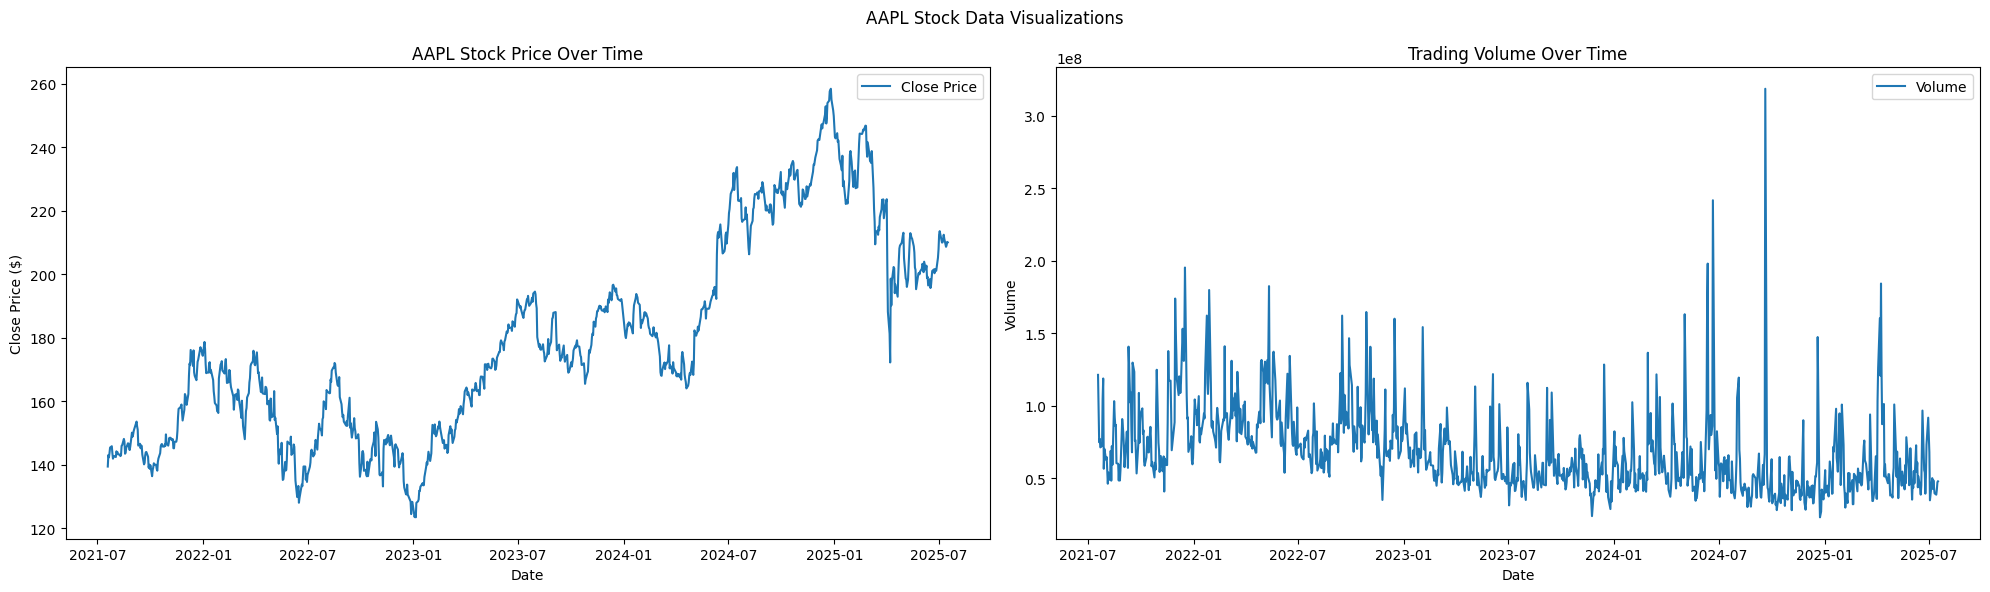

In [9]:
def stock_plots():
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle('AAPL Stock Data Visualizations')
    
    ax[0].plot(stock_df['Date'], stock_df['Close'], label='Close Price')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Close Price ($)')
    ax[0].set_title('AAPL Stock Price Over Time')
    ax[0].legend()

    ax[1].plot(stock_df['Date'], stock_df['Volume'], label='Volume')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Volume')
    ax[1].set_title('Trading Volume Over Time')
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()

stock_plots()    
    

Plot the `daily returns distribution`

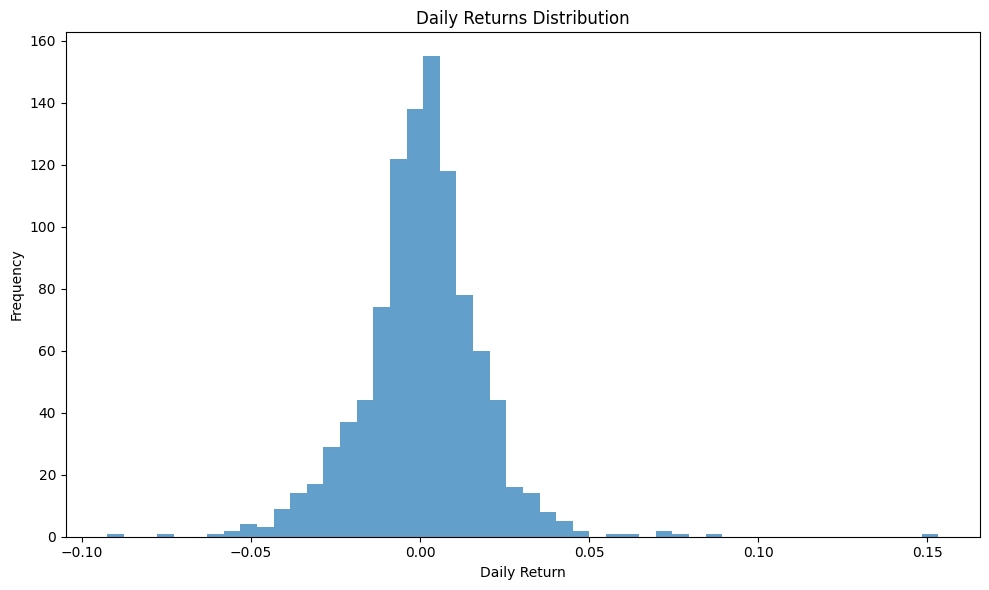

In [10]:
daily_returns = stock_df['Close'].pct_change()
def stock_daily_returns():
    plt.figure(figsize=(10, 6))
    plt.hist(daily_returns.dropna(), bins=50, alpha=0.7)
    plt.title("Daily Returns Distribution")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()
    
stock_daily_returns()

Check skewness

In [11]:
stock_df.skew(numeric_only=True)

Close     0.501538
High      0.507933
Low       0.489330
Open      0.499856
Volume    2.022445
dtype: float64

Plot the correlation

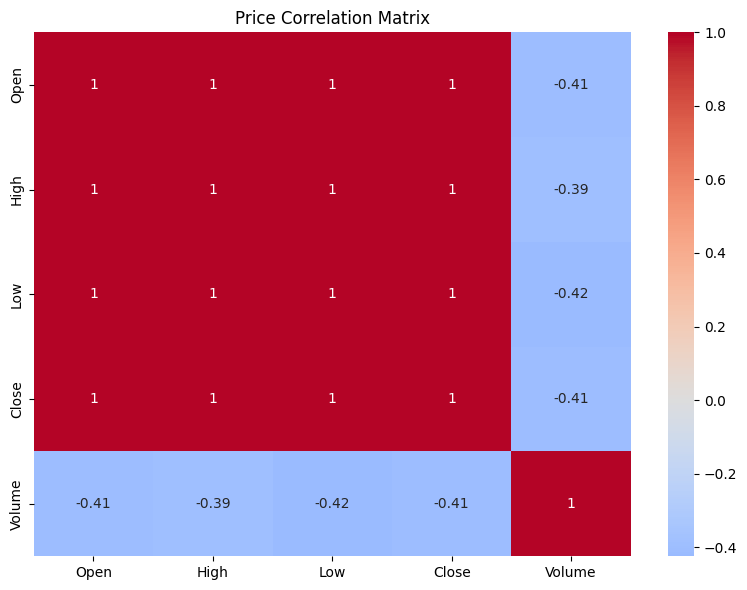

In [12]:
def stock_corr_heatmap():
    price_corr = stock_df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(price_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Price Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
stock_corr_heatmap()

Calcualte and check some important insights

In [13]:
avg_daily_return = daily_returns.mean()
daily_return_volatility = daily_returns.std()
best_trading_day = daily_returns.max()
worst_trading_day = daily_returns.min()
avg_trading_volume = stock_df['Volume'].mean()
price_appreciation = ((stock_df['Close'].iloc[-1] / stock_df['Close'].iloc[0]) - 1)

print("\nKEY INSIGHTS")
print(f"• Average daily return: {avg_daily_return:.4f} ({avg_daily_return*100:.2f}%)")
print(f"• Daily return volatility: {daily_return_volatility:.4f} ({daily_return_volatility*100:.2f}%)")
print(f"• Best trading day: {best_trading_day:.4f} ({best_trading_day*100:.2f}%)")
print(f"• Worst trading day: {worst_trading_day:.4f} ({worst_trading_day*100:.2f}%)")
print(f"• Average trading volume: {avg_trading_volume:,.0f}")
print(f"• Price appreciation: {price_appreciation*100:.1f}%")

print("\nDATA QUALITY ISSUES TO ADDRESS")
issues = []

if stock_df.isna().any().any():
    issues.append("⚠️ Missing values in stock data")
    
if news_df.isna().any().any():
    issues.append("⚠️ Missing values in news data")
    
if len(news_df) < 50:
    issues.append("⚠️ Limited news data (< 50 articles)")

if (stock_df['Volume'] == 0).any():
    issues.append("⚠️ Zero trading volume days")

if len(issues) == 0:
    print("✅ No major data quality issues found!")
else:
    for issue in issues:
        print(f"•⚠️ {issue}")


KEY INSIGHTS
• Average daily return: 0.0006 (0.06%)
• Daily return volatility: 0.0180 (1.80%)
• Best trading day: 0.1533 (15.33%)
• Worst trading day: -0.0925 (-9.25%)
• Average trading volume: 68,479,029
• Price appreciation: 50.7%

DATA QUALITY ISSUES TO ADDRESS
✅ No major data quality issues found!


Plot moving averages

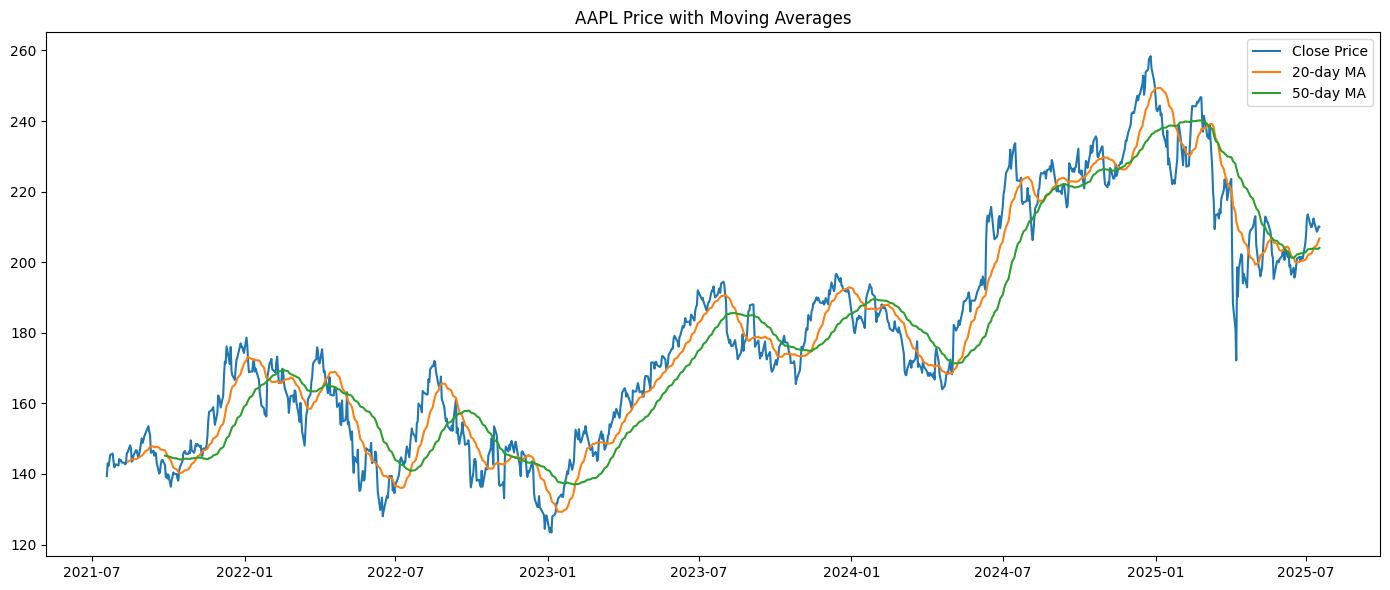

In [14]:
def plot_moving_averages():
    stock_df['MA20'] = stock_df['Close'].rolling(window=20).mean()
    stock_df['MA50'] = stock_df['Close'].rolling(window=50).mean()
    
    plt.figure(figsize=(14, 6))
    plt.plot(stock_df['Date'], stock_df['Close'], label='Close Price')
    plt.plot(stock_df['Date'], stock_df['MA20'], label='20-day MA')
    plt.plot(stock_df['Date'], stock_df['MA50'], label='50-day MA')
    plt.title("AAPL Price with Moving Averages")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_moving_averages()


Visualizing rolling standard deviation of returns.

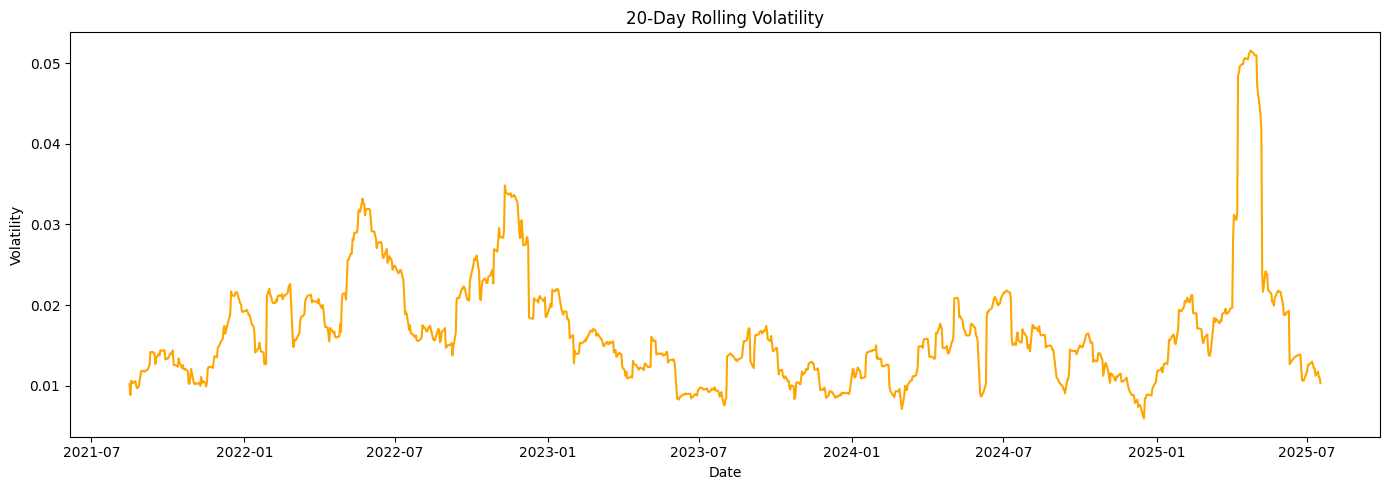

In [15]:
def plot_rolling_volatility(window=20):
    rolling_vol = daily_returns.rolling(window=window).std()
    plt.figure(figsize=(14, 5))
    plt.plot(stock_df['Date'], rolling_vol, color='orange')
    plt.title(f"{window}-Day Rolling Volatility")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.tight_layout()
    plt.show()

plot_rolling_volatility()

For visual inspection of volatility spikes.

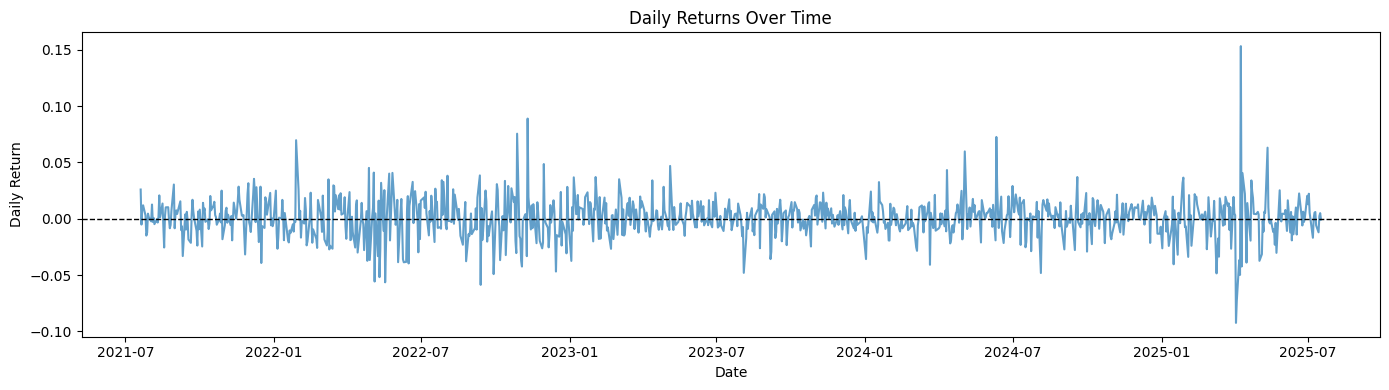

In [16]:
def plot_daily_returns():
    plt.figure(figsize=(14, 4))
    plt.plot(stock_df['Date'], daily_returns, alpha=0.7)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title("Daily Returns Over Time")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.tight_layout()
    plt.show()

plot_daily_returns()

Spot outliers

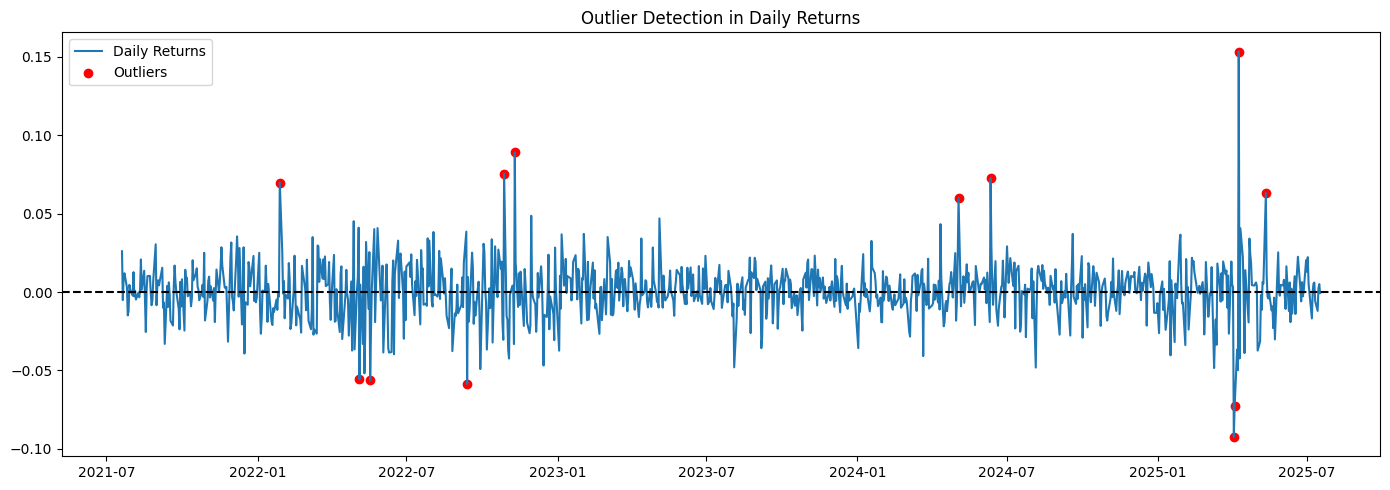

In [17]:
def plot_return_outliers():
    z_scores = (daily_returns - daily_returns.mean()) / daily_returns.std()
    outliers = stock_df['Date'][z_scores.abs() > 3]

    plt.figure(figsize=(14, 5))
    plt.plot(stock_df['Date'], daily_returns, label='Daily Returns')
    plt.scatter(outliers, daily_returns.loc[outliers.index], color='red', label='Outliers')
    plt.axhline(0, color='black', linestyle='--')
    plt.title("Outlier Detection in Daily Returns")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_return_outliers()

Heatmap for monthly retursn

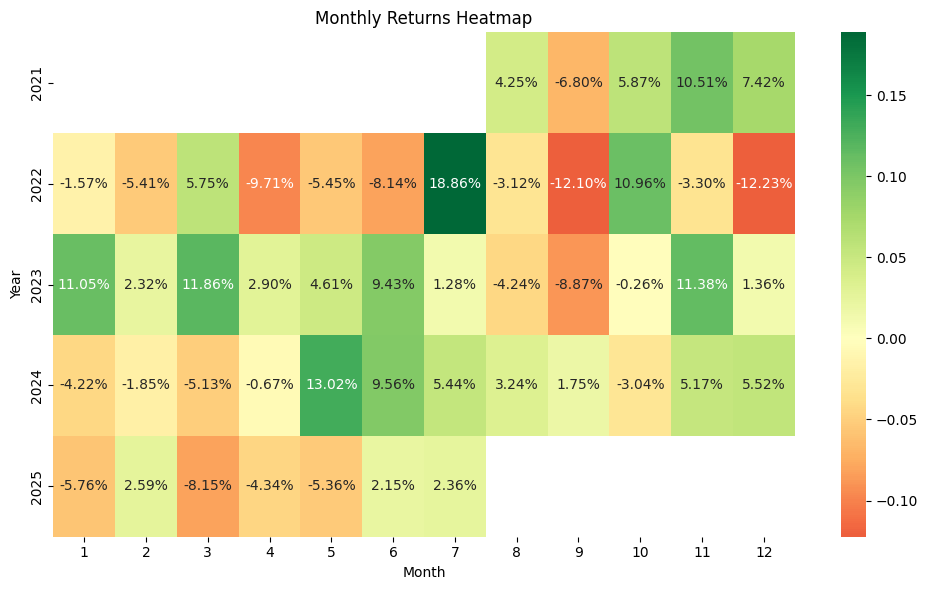

In [18]:
def monthly_return_heatmap():
    monthly_returns = stock_df.set_index('Date')['Close'].resample('ME').ffill().pct_change()
    monthly_returns = monthly_returns.to_frame(name='Monthly Return')
    monthly_returns['Year'] = monthly_returns.index.year
    monthly_returns['Month'] = monthly_returns.index.month
    pivot = monthly_returns.pivot_table(index='Year', columns='Month', values='Monthly Return')

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt=".2%", cmap="RdYlGn", center=0)
    plt.title("Monthly Returns Heatmap")
    plt.tight_layout()
    plt.show()

monthly_return_heatmap()

Test if yesterday's return predicts today's.

In [19]:
def lagged_correlation():
    stock_df['Lag1'] = daily_returns.shift(1)
    stock_df['Today'] = daily_returns
    corr = stock_df[['Lag1', 'Today']].corr().iloc[0,1]
    print(f"Lag-1 correlation of daily returns: {corr:.4f}")
    
lagged_correlation()

Lag-1 correlation of daily returns: 0.0068


### **News data EDA**

In [20]:
print("\n📊 NEWS DATA OVERVIEW")
print(f"Shape: {news_df.shape}")
print(f"Date range: {news_df['publishedAt'].iloc[0]} to {news_df['publishedAt'].iloc[-1]}")
print(f"Columns: {list(news_df.columns)}")
print(f"Missing values:\n{news_df.isna().sum()}")

news_df.head()


📊 NEWS DATA OVERVIEW
Shape: (100, 8)
Date range: 2025-07-09T14:03:37Z to 2025-07-08T20:38:38Z
Columns: ['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content']
Missing values:
source         0
author         0
title          0
description    0
url            0
urlToImage     0
publishedAt    0
content        0
dtype: int64


,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Brandt Ranj,The best Apple Watch Prime Day deals,Apple typically doesn’t discount its own hardw...,https://www.theverge.com/tech/698764/best-appl...,https://platform.theverge.com/wp-content/uploa...,2025-07-09T14:03:37Z,Apple typically doesn’t discount its own hardw...
1,"{'id': 'the-verge', 'name': 'The Verge'}","Jay Peters, Barbara Krasnoff",Why I love my Apple EarPods,"Jay Peters is a news editor for The Verge, whi...",https://www.theverge.com/tech/704616/apple-ear...,https://platform.theverge.com/wp-content/uploa...,2025-07-15T14:51:16Z,"Jay Peters is a news editor for The Verge, whi..."
2,"{'id': 'the-verge', 'name': 'The Verge'}",Emma Roth,Apple just added more frost to its Liquid Glas...,Apple’s new Liquid Glass design language just ...,https://www.theverge.com/news/700066/apple-liq...,https://platform.theverge.com/wp-content/uploa...,2025-07-07T22:31:21Z,The latest iOS 26 developer beta makes Apples ...
3,"{'id': 'the-verge', 'name': 'The Verge'}",Sheena Vasani,The MLS Season Pass is 50 percent off ahead of...,Major League Soccer (MLS) is now nearly halfwa...,https://www.theverge.com/tech/696026/mls-seaso...,https://platform.theverge.com/wp-content/uploa...,2025-07-01T18:36:43Z,The MLS Season Pass grants access to this summ...
4,"{'id': 'the-verge', 'name': 'The Verge'}",Cameron Faulkner,Apple Wallet notifications for an F1 movie pro...,Apple poured some good money into making F1 – ...,https://www.theverge.com/news/692276/apple-wal...,https://platform.theverge.com/wp-content/uploa...,2025-06-24T19:15:41Z,While perhaps not as bad as the 2014 U2 debacl...


In [21]:
print("\nNEWS DATE ANALYSIS")
if 'publishedAt' in news_df.columns:
    news_df['publishedAt'] = pd.to_datetime(news_df['publishedAt'])
    print(f"News date range: {news_df['publishedAt'].min()} to {news_df['publishedAt'].max()}")
    print(f"Number of unique dates: {news_df['publishedAt'].dt.date.nunique()}")

print("\nNEWS TITLES SAMPLE")
if 'title' in news_df.columns:
    print("First 5 news titles:")
    for i, title in enumerate(news_df['title'].head()):
        print(f"{i+1}. {title}")

print("\nNEWS SOURCES")
if 'source' in news_df.columns:
    print(news_df['source'].value_counts().head(10))


NEWS DATE ANALYSIS
News date range: 2025-06-18 12:10:04+00:00 to 2025-07-16 10:57:47+00:00
Number of unique dates: 25

NEWS TITLES SAMPLE
First 5 news titles:
1. The best Apple Watch Prime Day deals
2. Why I love my Apple EarPods
3. Apple just added more frost to its Liquid Glass design
4. The MLS Season Pass is 50 percent off ahead of the All-Star game and Leagues Cup
5. Apple Wallet notifications for an F1 movie promotion ticked off iPhone owners

NEWS SOURCES
source
{'id': None, 'name': 'MacRumors'}                         38
{'id': None, 'name': 'Gizmodo.com'}                       34
{'id': 'the-verge', 'name': 'The Verge'}                  23
{'id': 'wired', 'name': 'Wired'}                           3
{'id': 'business-insider', 'name': 'Business Insider'}     2
Name: count, dtype: int64


Plot the number of articles per day

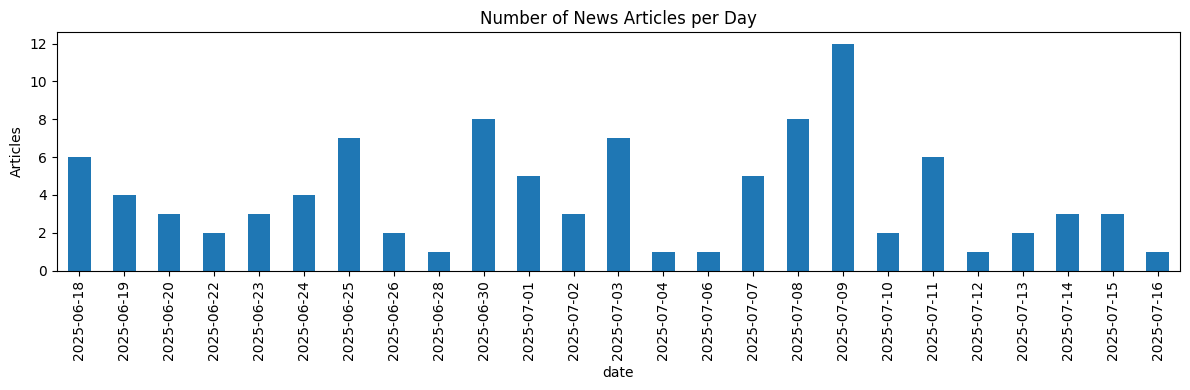

In [22]:
news_df['date'] = news_df['publishedAt'].dt.date
news_df['article_count'] = 1

daily_news = news_df.groupby('date')['article_count'].sum()

plt.figure(figsize=(12, 4))
daily_news.plot(kind='bar')
plt.title("Number of News Articles per Day")
plt.ylabel("Articles")
plt.tight_layout()
plt.show()


In [23]:
print(f"Stock data from {stock_df['Date'].min()} to {stock_df['Date'].max()}")

Stock data from 2021-07-19 00:00:00 to 2025-07-17 00:00:00
